<a href="https://colab.research.google.com/github/623020514-5/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. วันธรรมดา หรือวันเสาร์-อาทิตย์มีเครื่องบินขาเข้ามากกว่ากัน (วันจันทร์ = 1, วันอังคาร = 2, ...)

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [1]:
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [5]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [7]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [8]:
gen_exams('623020514-5')

รหัสนักศึกษา 623020514-5 ทำข้อ 5 และ 2


In [9]:
merged_table = airports.merge(flights,how='left',left_on='รหัสสนามบิน',right_on='รหัสสนามบินต้นทาง') #เป็นการเบรนตารางค่าข้อมูล เพื่อรวบรวมข้อมูลที่เรามีทั้งหมด
merged_table

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,10165,Adak Island,AK,Adak,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10299,Anchorage,AK,Ted Stevens Anchorage International,19.0,5.0,DL,10299.0,14869.0,27.0,2.0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-10.0,-38.0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-3.0,-27.0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,17.0,3.0,DL,10299.0,14869.0,-6.0,-23.0
...,...,...,...,...,...,...,...,...,...,...,...
2702508,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702509,11097,Cody,WY,Yellowstone Regional,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702510,11865,Gillette,WY,Gillette Campbell County,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702511,12441,Jackson,WY,Jackson Hole,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
merged_table.describe() #ดูค่าข้อมูลทางสถิติ

,รหัสสนามบิน,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
count,2.702513e+06,2.702218e+06,2.702218e+06,2.702218e+06,2.702218e+06,2.702218e+06,2.702218e+06
mean,1.274259e+04,1.579790e+01,3.899480e+00,1.274260e+04,1.274300e+04,1.051073e+01,6.655011e+00
std,1.501862e+03,8.798835e+00,1.985925e+00,1.501841e+03,1.501801e+03,3.602976e+01,3.854758e+01
min,1.013500e+04,1.000000e+00,1.000000e+00,1.014000e+04,1.014000e+04,-6.300000e+01,-9.400000e+01
25%,1.129200e+04,8.000000e+00,2.000000e+00,1.129200e+04,1.129200e+04,-4.000000e+00,-1.100000e+01
50%,1.289200e+04,1.600000e+01,4.000000e+00,1.289200e+04,1.289200e+04,-1.000000e+00,-3.000000e+00
75%,1.405700e+04,2.300000e+01,6.000000e+00,1.405700e+04,1.405700e+04,9.000000e+00,1.000000e+01
max,1.644000e+04,3.100000e+01,7.000000e+00,1.537600e+04,1.537600e+04,1.863000e+03,1.845000e+03


In [12]:
merged_table.isnull() #ดูว่าข้อมูลส่วนไหนที่เป็นช่องว่างบ้าง แต่จะไม่ค่อยช่วย

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,False,False,False,False,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2702508,False,False,False,False,True,True,True,True,True,True,True
2702509,False,False,False,False,True,True,True,True,True,True,True
2702510,False,False,False,False,True,True,True,True,True,True,True
2702511,False,False,False,False,True,True,True,True,True,True,True


In [13]:
merged_table.isnull().any() #ดูให้ละเอียดมากขึ้นต้องเพิ่ม .any()

รหัสสนามบิน           False
เมือง                 False
รัฐ                   False
ชื่อสนามบิน           False
วันในเดือน             True
วันในสัปดาห์           True
สายการบิน              True
รหัสสนามบินต้นทาง      True
รหัสสนามบินปลายทาง     True
ความล่าช้าขาออก        True
ความล่าช้าขาเข้า       True
dtype: bool

จะเห็นว่ามีค่า Missing จำนวนมากดังนั้นควรกำจัดค่า Missing

1.dropna คือตัดค่าข้อมูลออก แต่ต้องอยู่ที่ไม่เกิน 10 เปอร์เซ็นที่ยอกรับได้

In [16]:
merged_table.dropna()

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
1,10299,Anchorage,AK,Ted Stevens Anchorage International,19.0,5.0,DL,10299.0,14869.0,27.0,2.0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-10.0,-38.0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-3.0,-27.0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,17.0,3.0,DL,10299.0,14869.0,-6.0,-23.0
5,10299,Anchorage,AK,Ted Stevens Anchorage International,18.0,4.0,DL,10299.0,13487.0,-4.0,-31.0
...,...,...,...,...,...,...,...,...,...,...,...
2702496,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,13487.0,-7.0,-23.0
2702497,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,11433.0,23.0,26.0
2702498,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,10397.0,3.0,7.0
2702499,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,10397.0,-5.0,-7.0


ตรวจสอบว่าถ้าเราตัดข้อมูลไปแล้วข้อมูลหายไปกี่เปอร์เซ็น

In [15]:
removes = merged_table.shape[0] - merged_table.dropna().shape[0]
print(f'size before drop = {merged_table.shape[0]}')
print(f'size after drop = {merged_table.dropna().shape[0]}')
print(f'we lost {100*(removes/merged_table.shape[0])}% of data')

size before drop = 2702513
size after drop = 2702218
we lost 0.010915766177628008% of data


จะเห็นว่า ไม่เกินขอบเขตที่เรายอมรับได้ เพราะมีข้อมูลหายไปเพยง 0.01 เปอร์เซ็น 

ดังสามารถใช้ dropna() ได้เลย

In [17]:
merged = merged_table.dropna()
merged

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
1,10299,Anchorage,AK,Ted Stevens Anchorage International,19.0,5.0,DL,10299.0,14869.0,27.0,2.0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-10.0,-38.0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-3.0,-27.0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,17.0,3.0,DL,10299.0,14869.0,-6.0,-23.0
5,10299,Anchorage,AK,Ted Stevens Anchorage International,18.0,4.0,DL,10299.0,13487.0,-4.0,-31.0
...,...,...,...,...,...,...,...,...,...,...,...
2702496,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,13487.0,-7.0,-23.0
2702497,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,11433.0,23.0,26.0
2702498,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,10397.0,3.0,7.0
2702499,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,10397.0,-5.0,-7.0


##**ข้อคิดเอง**
ต้องการทราบว่ามีรอบบินจากสนามบินที่มีรหัส 10299 ทั้งหมดกี่ครั้งแล้ว และให้ดูว่าสนามบินใดมีค่าความล่าช้าขาออกน้อยที่สุด

In [20]:
Thing_urself = merged[merged['รหัสสนามบิน']==10299]        
Thing_urself[['เมือง','รหัสสนามบิน']]

,เมือง,รหัสสนามบิน
1,Anchorage,10299
2,Anchorage,10299
3,Anchorage,10299
4,Anchorage,10299
5,Anchorage,10299
...,...,...
7696,Anchorage,10299
7697,Anchorage,10299
7698,Anchorage,10299
7699,Anchorage,10299


In [21]:
Thing_urself.shape[0]

7700

ดังนั้น สนามบินมีรอบเที่ยวบินมาแล้วทั้งหมด 7700 เที่ยวบิน

In [24]:
Thing_urself2 = merged.sort_values(by=['ความล่าช้าขาออก'],ascending=True)  ##ดูความล่าช้าขาออกโดยเรียงจากน้อยไปมาก
Thing_urself2[['ชื่อสนามบิน','สายการบิน','ความล่าช้าขาออก']]

,ชื่อสนามบิน,สายการบิน,ความล่าช้าขาออก
1412149,Baltimore/Washington International Thurgood Ma...,F9,-63.0
1680517,Raleigh-Durham International,MQ,-60.0
502359,Denver International,EV,-52.0
714692,Southwest Florida International,FL,-49.0
195168,Los Angeles International,OO,-45.0
...,...,...,...
96816,Phoenix Sky Harbor International,AA,1481.0
2179231,Philadelphia International,AA,1487.0
2579969,Salt Lake City International,AA,1620.0
1834865,McCarran International,HA,1847.0


ดังนั้น สนามบินที่มีค่าความล่าช้าน้อยที่สุด คือ Baltimore/Washington International Thurgood ซึ่งเป็นของสายการบิน F9

##**ข้อ 2** วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
ต้นทาง คือ ขาออก
ปลายทาง คือ ขาเข้า

ขาออก คือ ออกจากสนามบิน


In [37]:
data_2 = merged[['ชื่อสนามบิน','วันในสัปดาห์','รหัสสนามบินต้นทาง']] #เลือกข้อมูลที่เราต้องการ
data_2

,ชื่อสนามบิน,วันในสัปดาห์,รหัสสนามบินต้นทาง
1,Ted Stevens Anchorage International,5.0,10299.0
2,Ted Stevens Anchorage International,2.0,10299.0
3,Ted Stevens Anchorage International,2.0,10299.0
4,Ted Stevens Anchorage International,3.0,10299.0
5,Ted Stevens Anchorage International,4.0,10299.0
...,...,...,...
2702496,General Mitchell International,4.0,13342.0
2702497,General Mitchell International,4.0,13342.0
2702498,General Mitchell International,4.0,13342.0
2702499,General Mitchell International,4.0,13342.0


In [28]:
from matplotlib import pyplot as plt #เพราะเราต้องวาดกราฟ

In [31]:
import numpy as np

In [32]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(20)
x

array([122.84223572,  82.23875477, 100.12927133, 109.26890111,
       114.79442414, 114.41506184, 117.562647  ,  90.62350706,
       108.50432958,  73.06783437,  99.67234903, 113.26736942,
       127.46730764,  82.30736784, 124.64996154,  75.69906071,
       109.88101283,  85.19937571,  87.26487899, 108.63901525])

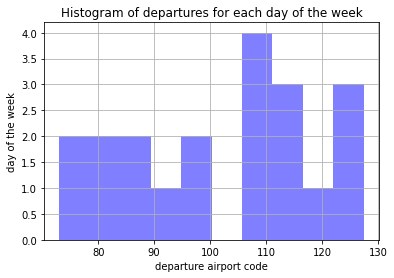

In [36]:
# Fixing random state for reproducibility
np.random.seed() #ไม่ระบุจุดเริ่มต้นในการแรนด้อม

# the histogram of the data
n, bins, patches = plt.hist(x, 10, facecolor='b', alpha=0.5)


plt.xlabel('departure airport code') #ตั้งชื่อแกน x
plt.ylabel('day of the week') #ตั้งชื่อแกน x
plt.title('Histogram of departures for each day of the week')#ตั้งชื่อgraph

plt.grid(True)
plt.show()

##**ข้อ 5** วันธรรมดา หรือวันเสาร์-อาทิตย์มีเครื่องบินขาเข้ามากกว่ากัน (วันจันทร์ = 1, วันอังคาร = 2, ...)

In [38]:
data_5 = merged[['ชื่อสนามบิน','วันในสัปดาห์','รหัสสนามบินปลายทาง']] #เลือกข้อมูลที่เราต้องการ
data_5

,ชื่อสนามบิน,วันในสัปดาห์,รหัสสนามบินปลายทาง
1,Ted Stevens Anchorage International,5.0,14869.0
2,Ted Stevens Anchorage International,2.0,13487.0
3,Ted Stevens Anchorage International,2.0,13487.0
4,Ted Stevens Anchorage International,3.0,14869.0
5,Ted Stevens Anchorage International,4.0,13487.0
...,...,...,...
2702496,General Mitchell International,4.0,13487.0
2702497,General Mitchell International,4.0,11433.0
2702498,General Mitchell International,4.0,10397.0
2702499,General Mitchell International,4.0,10397.0


ดังนั้นต้องดูว่าในแต่ล่ะวันมีกี่เที่ยวบิน โดยเราจะเรียกดูแค่รอบเที่ยวบินของแต่ล่ะวัน แล้ว .shape() เพื่อดูขนาด หรือก็คือจำนวนเที่ยวบิน

In [39]:
monday = merged[merged['วันในสัปดาห์']==1]        
monday[['วันในสัปดาห์','รหัสสนามบินปลายทาง']]

,วันในสัปดาห์,รหัสสนามบินปลายทาง
11,1.0,13487.0
12,1.0,13487.0
17,1.0,14869.0
32,1.0,14869.0
33,1.0,13487.0
...,...,...
2702458,1.0,11433.0
2702459,1.0,11433.0
2702460,1.0,11433.0
2702461,1.0,11433.0


In [46]:
monday.shape[0]

407837

แต่จะเสียเวลาเกิน ไป เราสามารถคำนวณบวกกันได้เลย

In [40]:
Tuesday = merged[merged['วันในสัปดาห์']==2]        
monday[['วันในสัปดาห์','รหัสสนามบินปลายทาง']]

,วันในสัปดาห์,รหัสสนามบินปลายทาง
11,1.0,13487.0
12,1.0,13487.0
17,1.0,14869.0
32,1.0,14869.0
33,1.0,13487.0
...,...,...
2702458,1.0,11433.0
2702459,1.0,11433.0
2702460,1.0,11433.0
2702461,1.0,11433.0


In [41]:
Wednesday = merged[merged['วันในสัปดาห์']==3]        
Wednesday[['วันในสัปดาห์','รหัสสนามบินปลายทาง']]

,วันในสัปดาห์,รหัสสนามบินปลายทาง
4,3.0,14869.0
18,3.0,13487.0
19,3.0,13487.0
20,3.0,14869.0
91,3.0,14747.0
...,...,...
2702477,3.0,11433.0
2702478,3.0,11433.0
2702479,3.0,11433.0
2702486,3.0,13487.0


In [45]:
Thursday = merged[merged['วันในสัปดาห์']==4]        
Thursday[['วันในสัปดาห์','รหัสสนามบินปลายทาง']]

,วันในสัปดาห์,รหัสสนามบินปลายทาง
5,4.0,13487.0
6,4.0,13487.0
22,4.0,13487.0
23,4.0,13487.0
24,4.0,14869.0
...,...,...
2702495,4.0,10397.0
2702496,4.0,13487.0
2702497,4.0,11433.0
2702498,4.0,10397.0


In [42]:
Friday = merged[merged['วันในสัปดาห์']==5]        
Friday[['วันในสัปดาห์','รหัสสนามบินปลายทาง']]

,วันในสัปดาห์,รหัสสนามบินปลายทาง
1,5.0,14869.0
25,5.0,13487.0
26,5.0,13487.0
37,5.0,14869.0
52,5.0,14747.0
...,...,...
2702415,5.0,13487.0
2702420,5.0,10397.0
2702421,5.0,10397.0
2702422,5.0,10397.0


In [43]:
Saturday = merged[merged['วันในสัปดาห์']==6]        
Saturday[['วันในสัปดาห์','รหัสสนามบินปลายทาง']]

,วันในสัปดาห์,รหัสสนามบินปลายทาง
7,6.0,13487.0
8,6.0,13487.0
10,6.0,14869.0
27,6.0,14869.0
28,6.0,13487.0
...,...,...
2702423,6.0,10397.0
2702424,6.0,10397.0
2702426,6.0,11433.0
2702427,6.0,13204.0


In [44]:
Sunday = merged[merged['วันในสัปดาห์']==7]        
Sunday[['วันในสัปดาห์','รหัสสนามบินปลายทาง']]

,วันในสัปดาห์,รหัสสนามบินปลายทาง
9,7.0,14869.0
13,7.0,13487.0
14,7.0,13487.0
30,7.0,13487.0
31,7.0,13487.0
...,...,...
2702447,7.0,13487.0
2702448,7.0,13487.0
2702449,7.0,13487.0
2702450,7.0,13487.0


**คำนวณ**

In [51]:
Work_Day = monday.shape[0] + Tuesday.shape[0]+ Wednesday.shape[0]+ Thursday.shape[0]+ Friday.shape[0]
Work_Day

2011453

In [50]:
Holiday = Saturday.shape[0]+ Sunday.shape[0]
Holiday

690765

##**จะเห็นได้ว่าในวันธรรมดามีเครื่องบินขาเข้า 2,011,453 เที่ยว และในวันธรรมดามีเครื่องบินขาเข้า 690,765 เที่ยว**

**ซึ่งแสดงว่า วันธรรมดามีเครื่องบินขาเข้ามากกว่าวันเสาร์-อาทิตย์**

In [53]:
Work_Day = monday.shape[0] + Tuesday.shape[0]+ Wednesday.shape[0]+ Thursday.shape[0]+ Friday.shape[0]
Holiday = Saturday.shape[0]+ Sunday.shape[0]
print(f'รอบบินวันธรรมดา = {Work_Day} เที่ยวบิน')
print(f'รอบบินวันหยุด = {Holiday} เที่ยวบิน')
print(f'วันธรรมดามีเครื่องบินขาเข้ามากกว่าวันเสาร์-อาทิตย์ อยู่ {Work_Day-Holiday} เที่ยวบิน')

รอบบินวันธรรมดา = 2011453 เที่ยวบิน
รอบบินวันหยุด = 690765 เที่ยวบิน
วันธรรมดามีเครื่องบินขาเข้ามากกว่าวันเสาร์-อาทิตย์ อยู่ 1320688 เที่ยวบิน


**มีอีกวิธีที่เราจะสามารถรู้จำนวนได้คือ การใช้ groupby**




In [58]:
merged.groupby('วันในสัปดาห์').count()

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
วันในสัปดาห์,,,,,,,,,,
1.0,407837,407837,407837,407837,407837,407837,407837,407837,407837,407837
2.0,397594,397594,397594,397594,397594,397594,397594,397594,397594,397594
3.0,403072,403072,403072,403072,403072,403072,403072,403072,403072,403072
4.0,406563,406563,406563,406563,406563,406563,406563,406563,406563,406563
5.0,396387,396387,396387,396387,396387,396387,396387,396387,396387,396387
6.0,318537,318537,318537,318537,318537,318537,318537,318537,318537,318537
7.0,372228,372228,372228,372228,372228,372228,372228,372228,372228,372228


In [62]:
WD = merged.groupby('วันในสัปดาห์').count().sort_values(by=['รหัสสนามบินปลายทาง'])
WD.iloc[:2,:]

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
วันในสัปดาห์,,,,,,,,,,
6.0,318537,318537,318537,318537,318537,318537,318537,318537,318537,318537
7.0,372228,372228,372228,372228,372228,372228,372228,372228,372228,372228


In [68]:
WD = merged.groupby('วันในสัปดาห์').count().sort_values(by=['รหัสสนามบินปลายทาง'])
WD.iloc[2:,:]

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
วันในสัปดาห์,,,,,,,,,,
5.0,396387,396387,396387,396387,396387,396387,396387,396387,396387,396387
2.0,397594,397594,397594,397594,397594,397594,397594,397594,397594,397594
3.0,403072,403072,403072,403072,403072,403072,403072,403072,403072,403072
4.0,406563,406563,406563,406563,406563,406563,406563,406563,406563,406563
1.0,407837,407837,407837,407837,407837,407837,407837,407837,407837,407837


จะเห็นว่า ค่าที่คอลัมน์รหัสสนามบิน ของวันเสาร์และอาทิตย์มีค่าน้อยกว่าในแถวอื่นๆดังนั้น จะสรุปได้ว่า วันธรรมดามีเครื่องบินขาเข้ามากกว่าวันเสาร์-อาทิตย์